## Imports

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

## EDA

In [53]:
file_path = 'data.csv'
data = pd.read_csv(file_path)

data.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


## Visualization

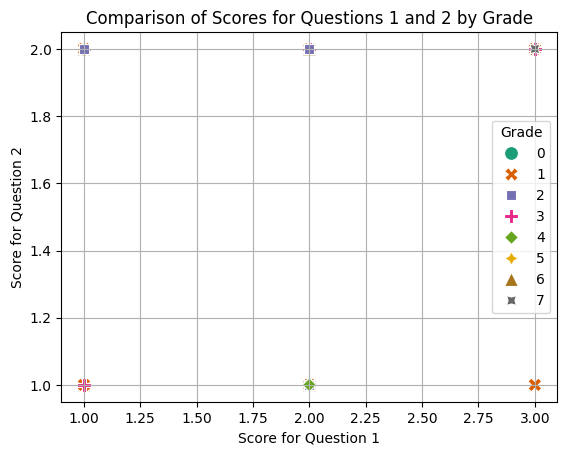

In [44]:
sns.scatterplot(x='1', y='2', data=data, hue='GRADE', palette='Dark2', style='GRADE', s=100)
plt.title('Comparison of Scores for Questions 1 and 2 by Grade')
plt.xlabel('Score for Question 1')
plt.ylabel('Score for Question 2')
plt.legend(title='Grade')
plt.grid(True)
plt.show()

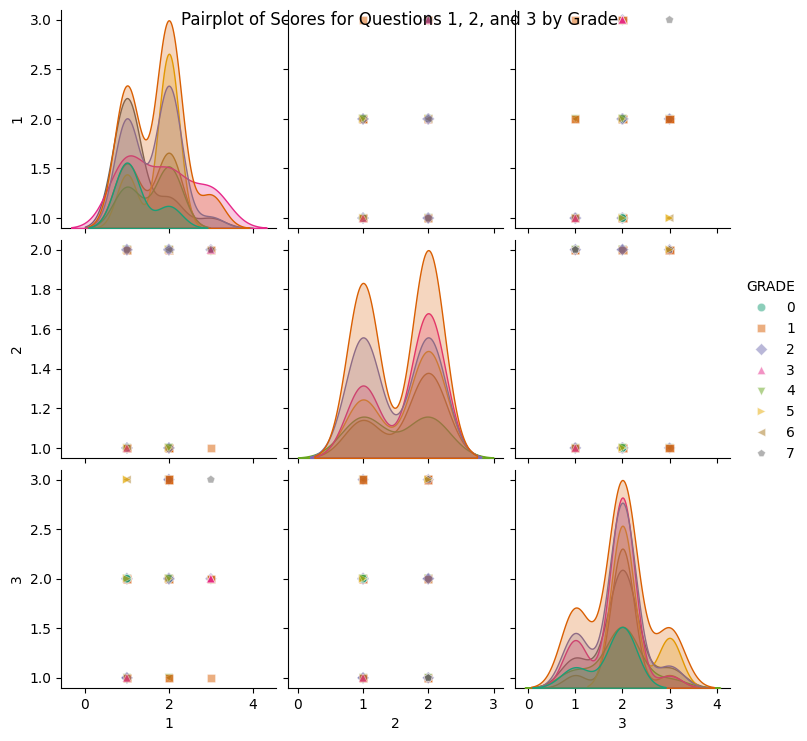

In [45]:
sns.pairplot(data[['1', '2', '3', 'GRADE']], hue='GRADE', palette='Dark2', 
             markers=["o", "s", "D", "^", "v", ">", "<", "p"], plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Scores for Questions 1, 2, and 3 by Grade', verticalalignment='top')
plt.show()

## Train | Test Split

In [54]:
# Drop non-numeric or identifier columns if they are not useful for model training
X = data.drop(['GRADE', 'STUDENT ID', 'COURSE ID'], axis=1)  # Assuming STUDENT ID and COURSE ID are not features for prediction
y = data['GRADE']  # Using 'GRADE' as the target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Tree Classifier

## Default Hyperparameters

In [47]:
# Assuming X_train and y_train are already defined from the previous split
model = DecisionTreeClassifier()

# Training the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
base_pred = model.predict(X_test)

## Evaluation

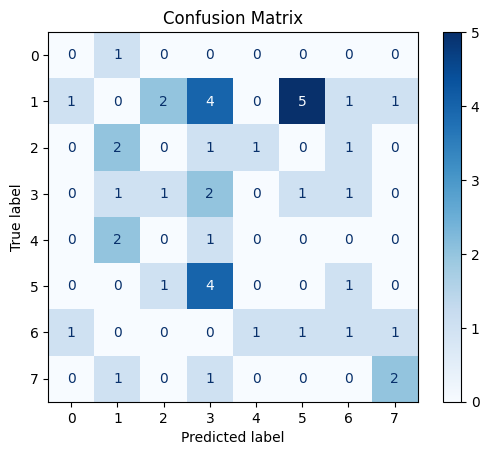

In [49]:
y_pred = model.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating the display object for the confusion matrix, specifying the labels of the classes
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plotting the confusion matrix
cmd.plot(cmap='Blues') 
plt.title('Confusion Matrix')
plt.show()

In [50]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.15      0.33      0.21         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       0.20      0.20      0.20         5
           7       0.50      0.50      0.50         4

    accuracy                           0.11        44
   macro avg       0.11      0.13      0.11        44
weighted avg       0.09      0.11      0.10        44



In [55]:
model.feature_importances_

array([0.01157991, 0.08716546, 0.02732859, 0.01042192, 0.        ,
       0.0380817 , 0.05485017, 0.05781184, 0.        , 0.04470548,
       0.05185734, 0.06112236, 0.03280975, 0.        , 0.02045785,
       0.0393717 , 0.        , 0.01157991, 0.04455108, 0.        ,
       0.        , 0.        , 0.03766799, 0.01736987, 0.03399114,
       0.03962904, 0.02254829, 0.04361767, 0.13469107, 0.07678986])

In [58]:
feature_importances = pd.DataFrame(index=data.drop(['GRADE', 'STUDENT ID', 'COURSE ID'], axis=1).columns,
                                   data=model.feature_importances_,
                                   columns=['Feature Importance'])

feature_importances

,Feature Importance
1,0.011580
2,0.087165
3,0.027329
4,0.010422
5,0.000000
6,0.038082
7,0.054850
8,0.057812
9,0.000000
10,0.044705


## Visualize the Tree

[Text(0.62725, 0.9642857142857143, 'x[28] <= 4.5\ngini = 0.855\nsamples = 101\nvalue = [7, 21, 19, 15, 7, 11, 8, 13]'),
 Text(0.3505, 0.8928571428571429, 'x[10] <= 1.5\ngini = 0.838\nsamples = 83\nvalue = [7, 20, 19, 6, 5, 8, 6, 12]'),
 Text(0.095, 0.8214285714285714, 'x[29] <= 1.5\ngini = 0.798\nsamples = 30\nvalue = [1, 11, 2, 2, 4, 4, 4, 2]'),
 Text(0.032, 0.75, 'x[28] <= 3.0\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 0, 0, 0, 0, 0, 1]'),
 Text(0.016, 0.6785714285714286, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0, 0, 0, 0, 0]'),
 Text(0.048, 0.6785714285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 1]'),
 Text(0.158, 0.75, 'x[18] <= 1.5\ngini = 0.829\nsamples = 25\nvalue = [1, 7, 2, 2, 4, 4, 4, 1]'),
 Text(0.08, 0.6785714285714286, 'x[11] <= 2.5\ngini = 0.56\nsamples = 5\nvalue = [0, 1, 0, 0, 3, 0, 1, 0]'),
 Text(0.064, 0.6071428571428571, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3, 0, 0, 0]'),
 Text(0.096, 0.6071428571428571, 'x[9] <= 2.0\ngini = 0.5\nsamp

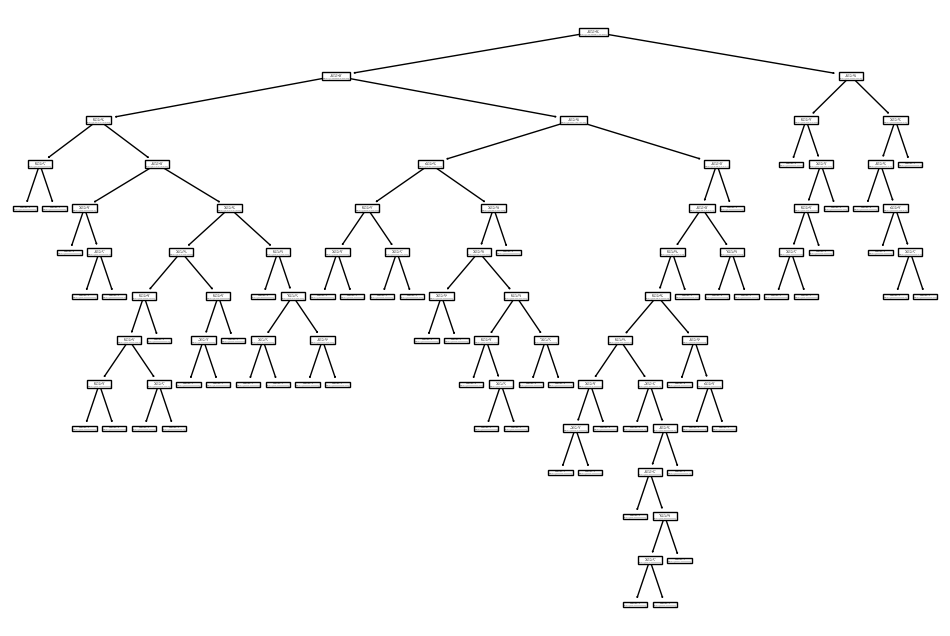

In [52]:
plt.figure(figsize=(12,8))
plot_tree(model)

In [72]:
def report_model(model, X_test, y_test, df):
    model_preds = model.predict(X_test)
    
    print(classification_report(y_test, model_preds))
    print('\n')

    plt.figure(figsize=(12, 8), dpi=150)
    plot_tree(model, filled=True, feature_names=df.drop(['GRADE', 'STUDENT ID', 'COURSE ID'], axis=1).columns)
    plt.show()

## Reporting Model Results

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         5
           3       0.15      0.33      0.21         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       0.20      0.20      0.20         5
           7       0.50      0.50      0.50         4

    accuracy                           0.11        44
   macro avg       0.11      0.13      0.11        44
weighted avg       0.09      0.11      0.10        44





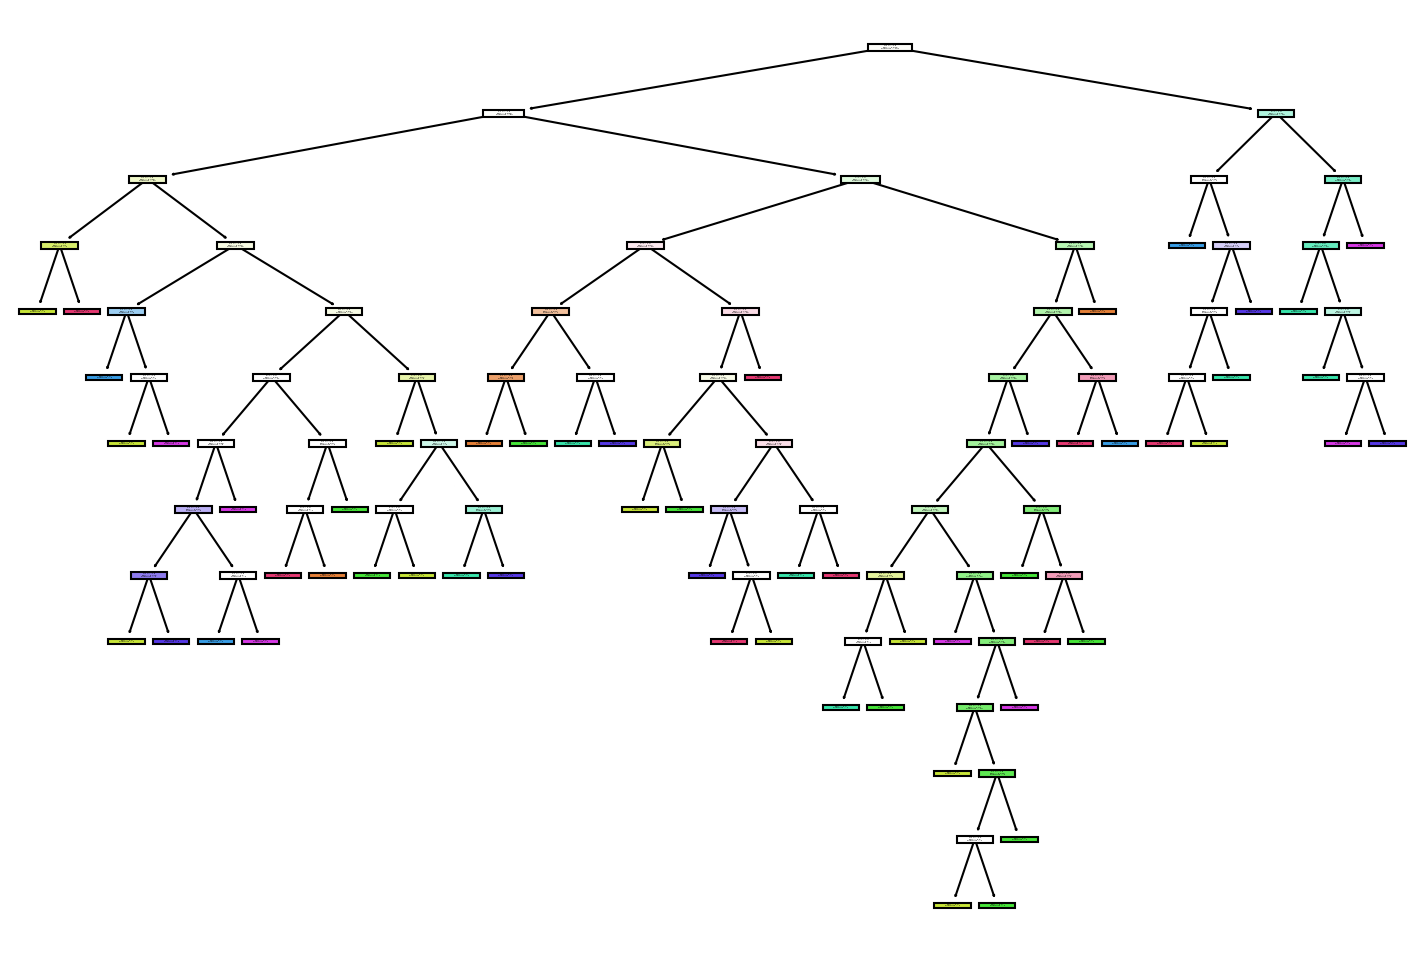

In [62]:
report_model(model, X_test, y_test, data)

## Understanding Hyperparameters

### Max Depth

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.29      0.29      0.29        14
           2       0.09      0.40      0.14         5
           3       0.25      0.17      0.20         6
           4       0.33      0.33      0.33         3
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         4

    accuracy                           0.18        44
   macro avg       0.12      0.15      0.12        44
weighted avg       0.16      0.18      0.16        44





/opt/homebrew/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

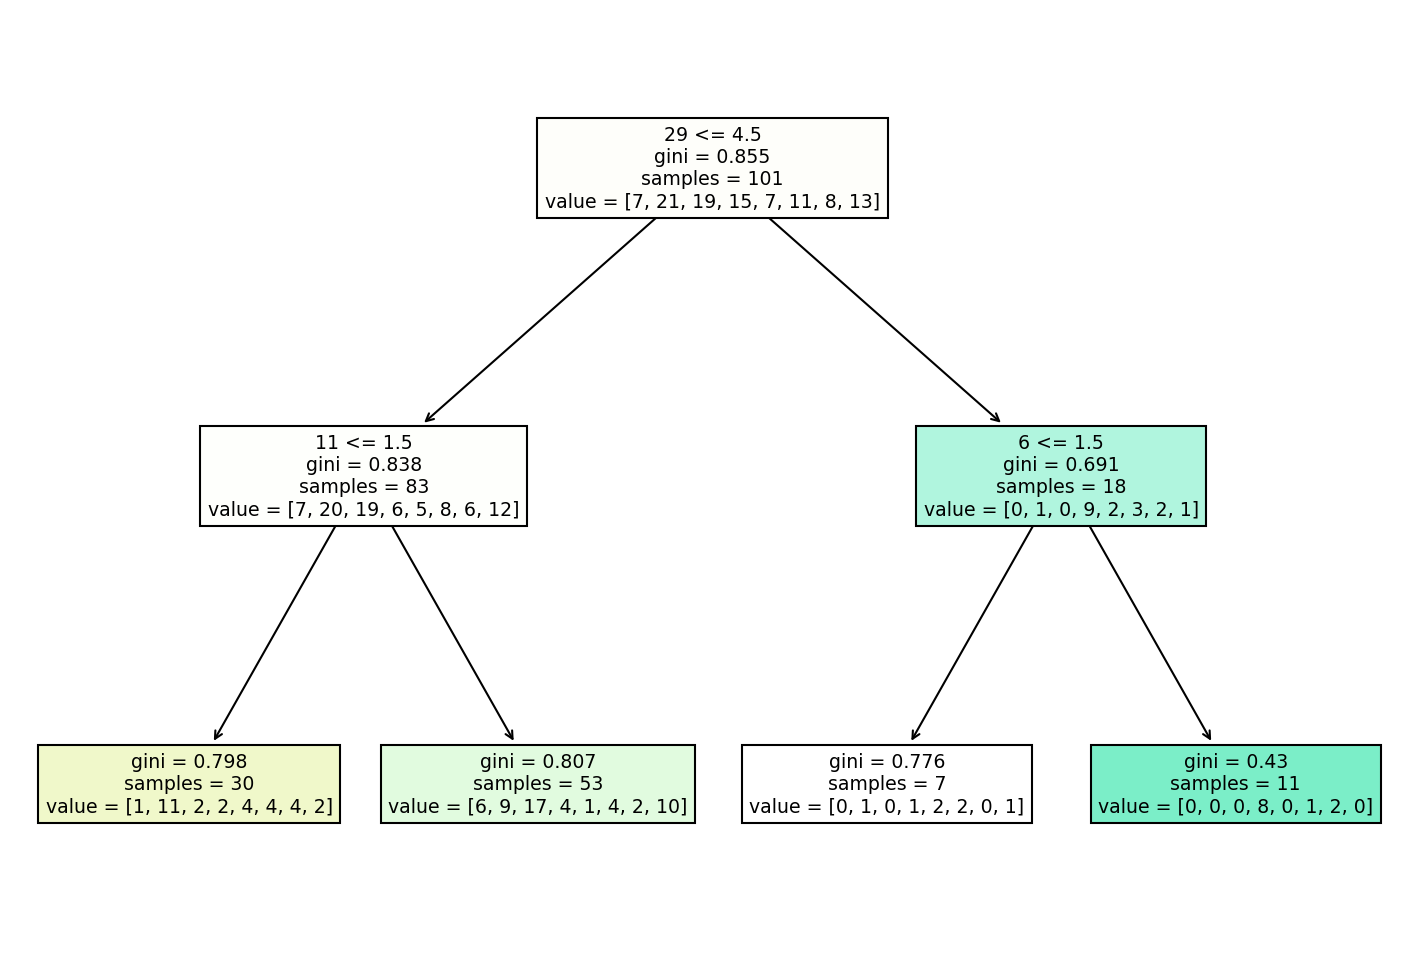

In [79]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train, y_train)

def report_model(model, X_test, y_test, df):
    model_preds = model.predict(X_test)
    
    print(classification_report(y_test, model_preds))
    print('\n') 

    plt.figure(figsize=(12, 8), dpi=150)
    plot_tree(model, filled=True, feature_names=df.drop(['GRADE', 'STUDENT ID', 'COURSE ID'], axis=1).columns)
    plt.show()

report_model(pruned_tree, X_test, y_test, data)

## Max Leaf Nodes

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.29      0.29      0.29        14
           2       0.09      0.40      0.14         5
           3       0.14      0.17      0.15         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         4

    accuracy                           0.16        44
   macro avg       0.06      0.11      0.07        44
weighted avg       0.12      0.16      0.13        44





/opt/homebrew/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Cellar/jupyterlab/4.0.5_1/libexec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

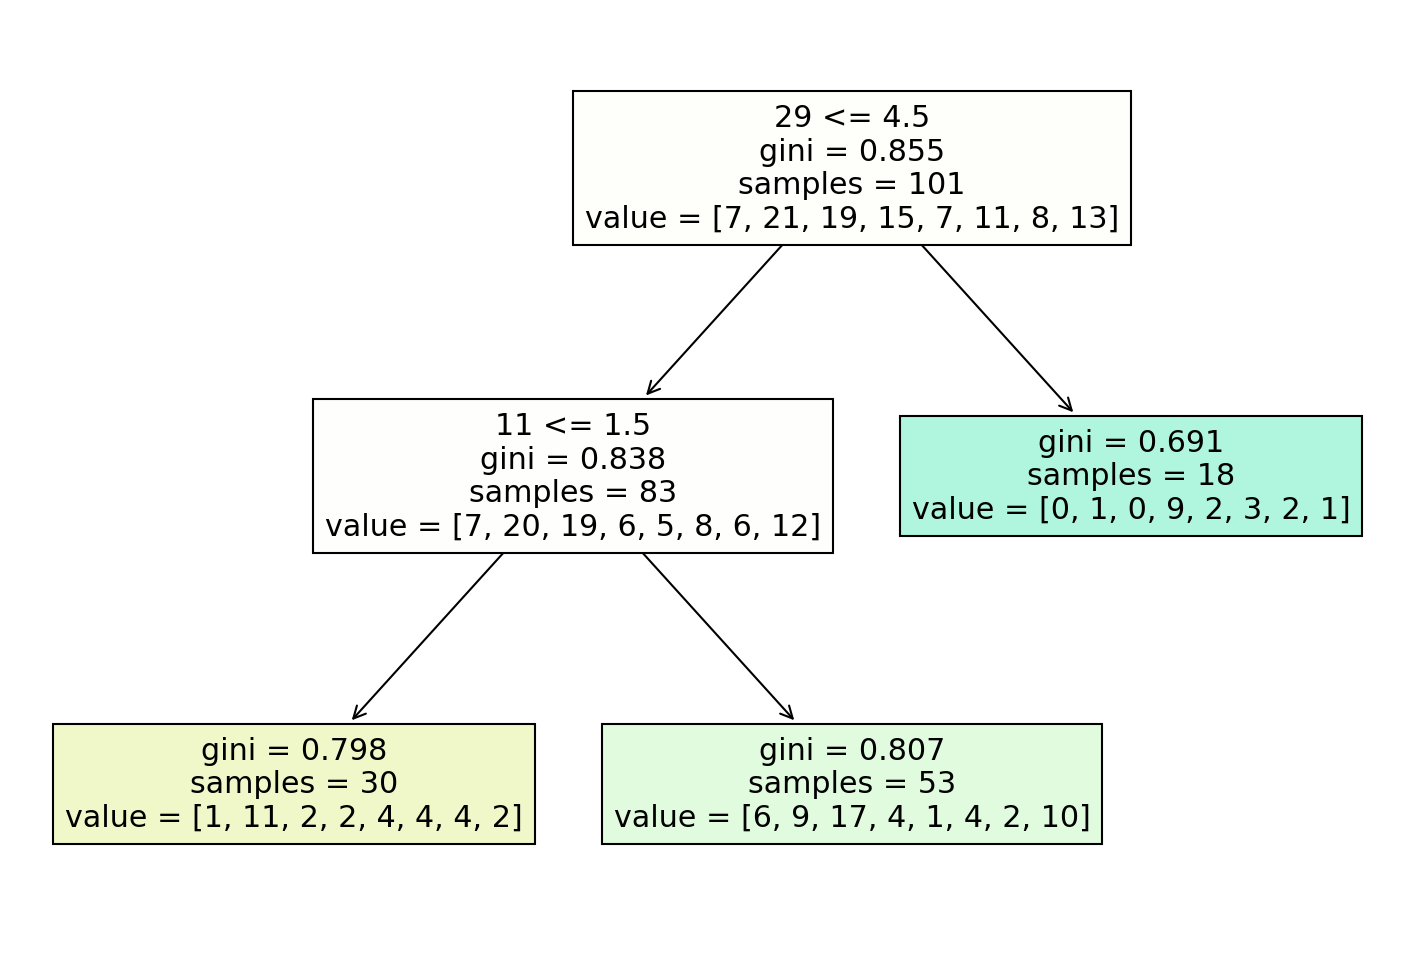

In [78]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train, y_train)

def report_model(model, X_test, y_test, df):
    model_preds = model.predict(X_test)
    
    print(classification_report(y_test, model_preds))
    print('\n')  

    plt.figure(figsize=(12, 8), dpi=150)
    plot_tree(model, filled=True, feature_names=df.drop(['GRADE', 'STUDENT ID', 'COURSE ID'], axis=1).columns)
    plt.show()

report_model(pruned_tree, X_test, y_test, data)

## Criterion

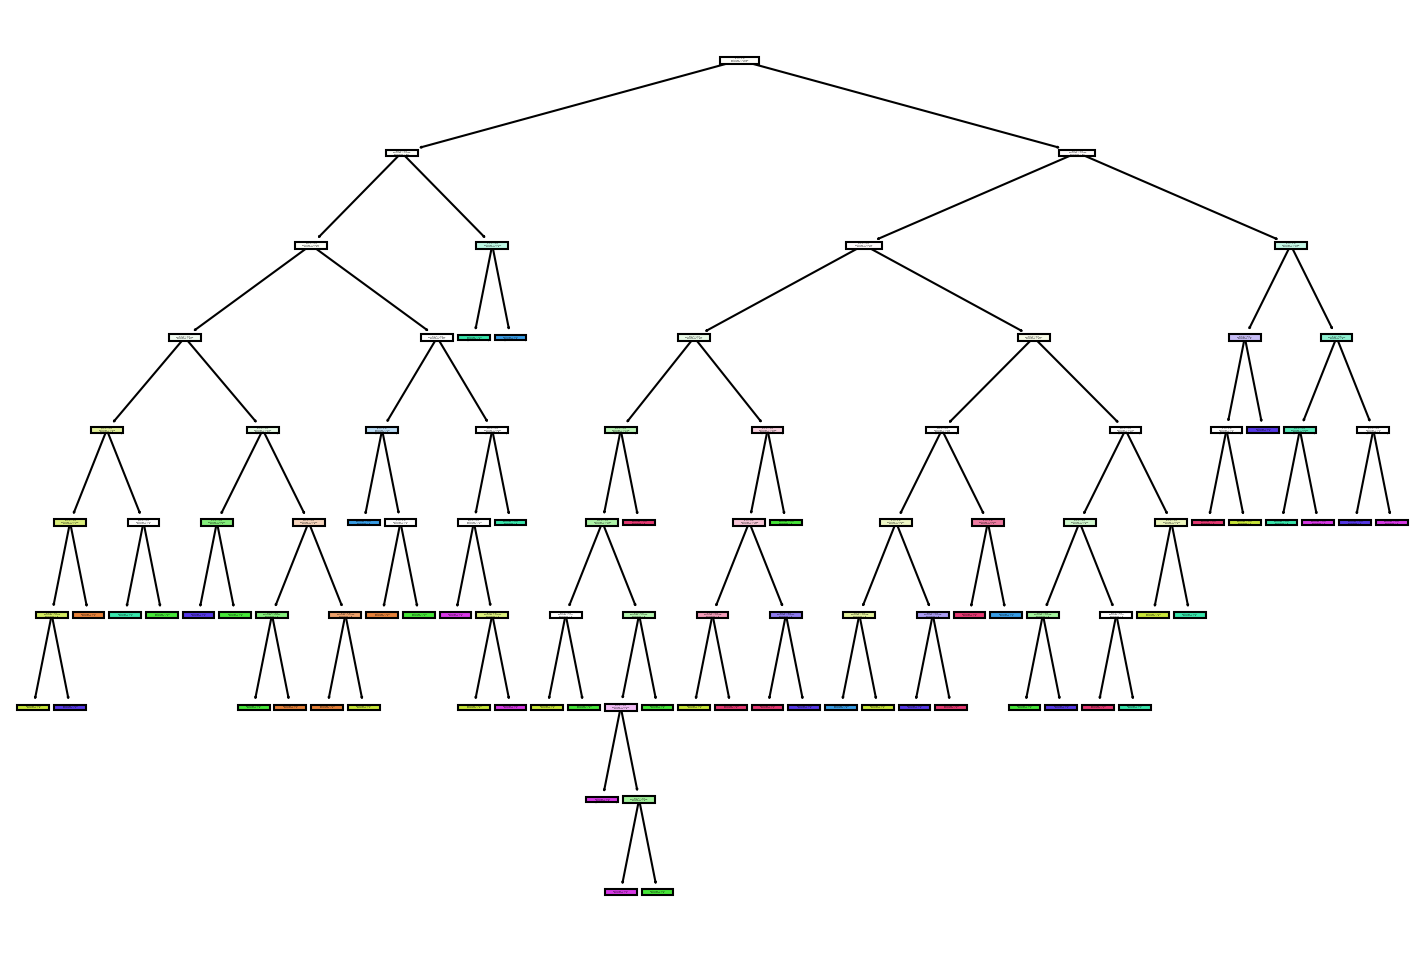

In [85]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train, y_train)

def report_model(model, X_test, y_test, df):
    model_preds = model.predict(X_test)

    plt.figure(figsize=(12, 8), dpi=150)
    plot_tree(model, filled=True, feature_names=df.drop(['GRADE', 'STUDENT ID', 'COURSE ID'], axis=1).columns)
    plt.show()

report_model(entropy_tree, X_test, y_test, data)